# Import all the Python libraries needed for loading data, normalization, K-Means clustering, and PCA

In [1]:
# For data manipulation
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt

# For scaling data and clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# For dimensionality reduction
from sklearn.decomposition import PCA

# Load the mtcars.csv dataset and prepare it for clustering

In [2]:
# Load the dataset into a dataframe 'df' [cite: 10]
df = pd.read_csv('mtcars.csv')

# Drop all columns except ['car_model', 'mpg', 'hp'] [cite: 11]
df_subset = df[['car_model', 'mpg', 'hp']]

# Study the dataset [cite: 12]
print("--- Initial Data Info ---")
df_subset.info()

print("\n--- Data Head ---")
print(df_subset.head())

print("\n--- Data Description ---")
print(df_subset.describe())

# Create a new dataframe 'cars' with numeric data only [cite: 15]
# We drop the non-numeric 'car_model' column [cite: 14, 16]
cars = df_subset.drop('car_model', axis=1)

# Confirm 'cars' contains only numeric values [cite: 17]
print("\n--- 'cars' DataFrame Info (Numeric Only) ---")
cars.info()

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   car_model  32 non-null     object 
 1   mpg        32 non-null     float64
 2   hp         32 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 900.0+ bytes

--- Data Head ---
           car_model   mpg   hp
0          Mazda RX4  21.0  110
1      Mazda RX4 Wag  21.0  110
2         Datsun 710  22.8   93
3     Hornet 4 Drive  21.4  110
4  Hornet Sportabout  18.7  175

--- Data Description ---
             mpg          hp
count  32.000000   32.000000
mean   20.090625  146.687500
std     6.026948   68.562868
min    10.400000   52.000000
25%    15.425000   96.500000
50%    19.200000  123.000000
75%    22.800000  180.000000
max    33.900000  335.000000

--- 'cars' DataFrame Info (Numeric Only) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries,

# Description of Data

The `df_subset.info()` output shows:

There are 32 entries (car models).

The `car_model` column is of type object (text/string).

The `mpg` (Miles Per Gallon) and `hp` (Horsepower) columns are `float64` and `int64` respectively (numeric).

There are no missing values.

The `cars.info()` output confirms that this new dataframe only contains the 32 entries for mpg and hp, which are both numeric and suitable for K-Means.

# Normalize the cars data and run K-Means for k=3, 10, and 20.

--- Normalized Data (Top 10) ---
[[ 0.15329914 -0.54365487]
 [ 0.15329914 -0.54365487]
 [ 0.4567366  -0.7955699 ]
 [ 0.22072968 -0.54365487]
 [-0.23442651  0.41954967]
 [-0.33557233 -0.61774753]
 [-0.97616253  1.45684686]
 [ 0.72645879 -1.25494437]
 [ 0.4567366  -0.76593284]
 [-0.15013833 -0.35101396]]

--- K=3 Model ---
Predictions (y_pred): [0 0 0 0 0 0 2 1 0 0 0 0 0 0 2 2 2 1 1 1 0 0 0 2 0 1 1 1 2 0 2 0]
Cluster Centers (scaled): [[-0.16324982 -0.16495907]
 [ 1.54525829 -1.0834728 ]
 [-1.12547303  1.50765326]]


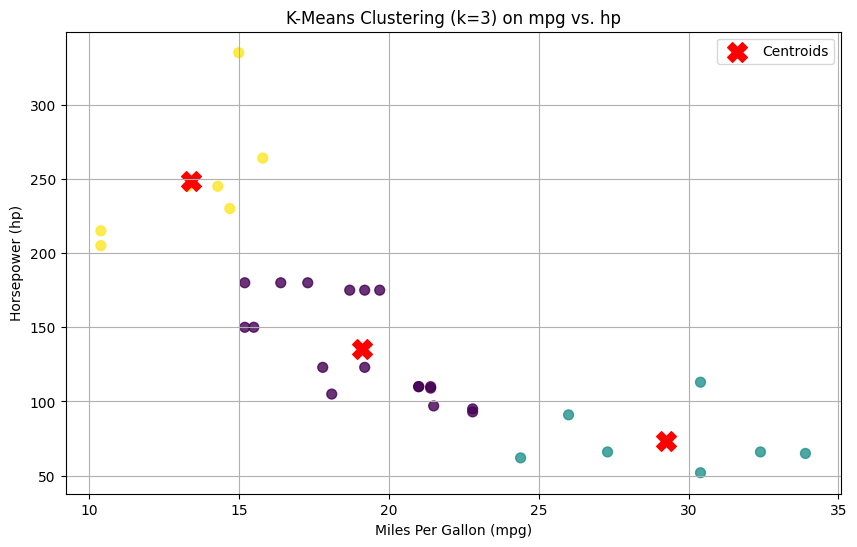

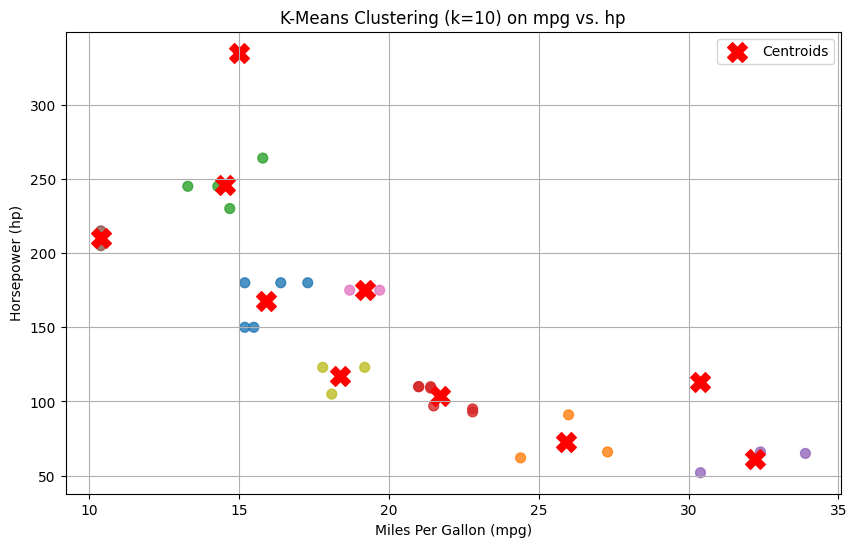

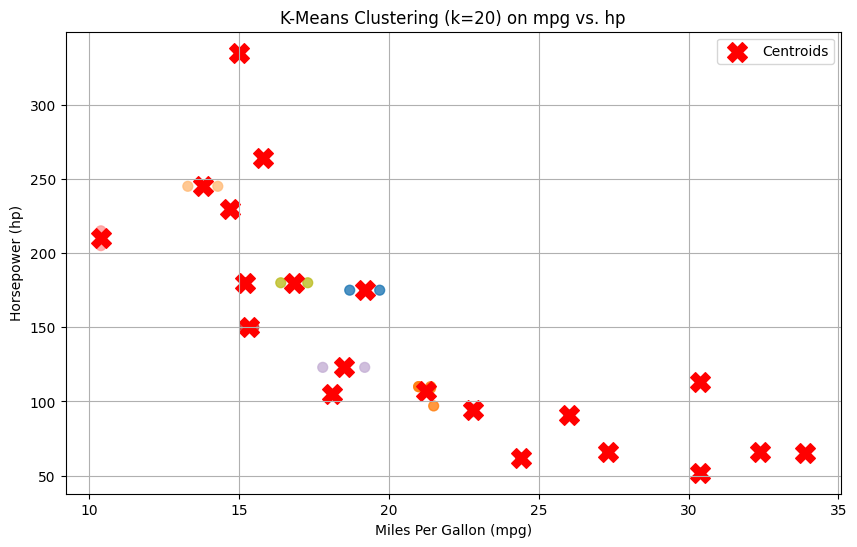

In [3]:
# Normalize the 'cars' dataset [cite: 19]
scaler_2d = StandardScaler()
cars_scaled = scaler_2d.fit_transform(cars)

# Confirm normalization by showing the top 10 instances [cite: 20]
print("--- Normalized Data (Top 10) ---")
print(cars_scaled[:10])

# Run k-means for k=3, k=10, and k=20 [cite: 21]
# Set random seed to 42 [cite: 22]
km3 = KMeans(n_clusters=3, random_state=42, n_init=10).fit(cars_scaled)
km10 = KMeans(n_clusters=10, random_state=42, n_init=10).fit(cars_scaled)
km20 = KMeans(n_clusters=20, random_state=42, n_init=10).fit(cars_scaled)

# Print predictions (y_pred) and cluster centers for k=3 [cite: 23, 24, 25]
print("\n--- K=3 Model ---")
print("Predictions (y_pred):", km3.labels_)
print("Cluster Centers (scaled):", km3.cluster_centers_)

# (You would repeat the print statements for km10 and km20)
# print("\n--- K=10 Model ---")
# print("Predictions (y_pred):", km10.labels_)
# print("Cluster Centers (scaled):", km10.cluster_centers_)
#
# print("\n--- K=20 Model ---")
# print("Predictions (y_pred):", km20.labels_)
# print("Cluster Centers (scaled):", km20.cluster_centers_)


# --- Visualize the clusters --- [cite: 26]
# We must inverse_transform the centers to plot them on the original (unscaled) axes
centers3 = scaler_2d.inverse_transform(km3.cluster_centers_)
centers10 = scaler_2d.inverse_transform(km10.cluster_centers_)
centers20 = scaler_2d.inverse_transform(km20.cluster_centers_)

# Plot for k=3 [cite: 27, 28]
plt.figure(figsize=(10, 6))
plt.scatter(cars['mpg'], cars['hp'], c=km3.labels_, cmap='viridis', s=50, alpha=0.8)
plt.scatter(centers3[:, 0], centers3[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering (k=3) on mpg vs. hp')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Horsepower (hp)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for k=10 [cite: 27, 28]
plt.figure(figsize=(10, 6))
plt.scatter(cars['mpg'], cars['hp'], c=km10.labels_, cmap='tab10', s=50, alpha=0.8)
plt.scatter(centers10[:, 0], centers10[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering (k=10) on mpg vs. hp')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Horsepower (hp)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for k=20 [cite: 27, 28]
plt.figure(figsize=(10, 6))
plt.scatter(cars['mpg'], cars['hp'], c=km20.labels_, cmap='tab20', s=50, alpha=0.8)
plt.scatter(centers20[:, 0], centers20[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means Clustering (k=20) on mpg vs. hp')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Horsepower (hp)')
plt.legend()
plt.grid(True)
plt.show()

# Analysis: Which k is best?
 * k=3 provides the best clusters.
 * k=3: The plot shows three distinct and logical groups:
   * High MPG / Low HP (economy cars)
   * Low MPG / High HP (sports/muscle cars)
   * Medium MPG / Medium HP (sedans/cruisers)

 * k=10: This model starts to overfit. Several clusters contain only one or two data points, which doesn't represent a meaningful grouping.

 * k=20: This is severe overfitting. With only 32 data points, 20 clusters are meaningless. Many centroids are assigned to a single point.

 * Conclusion: k=3 offers the most interpretable and balanced segmentation of the data based on these two features.

# Repeat the process using all numeric features, not just mpg and hp. The plots will still show mpg vs. hp, but the cluster assignments will be based on all 11 dimensions.

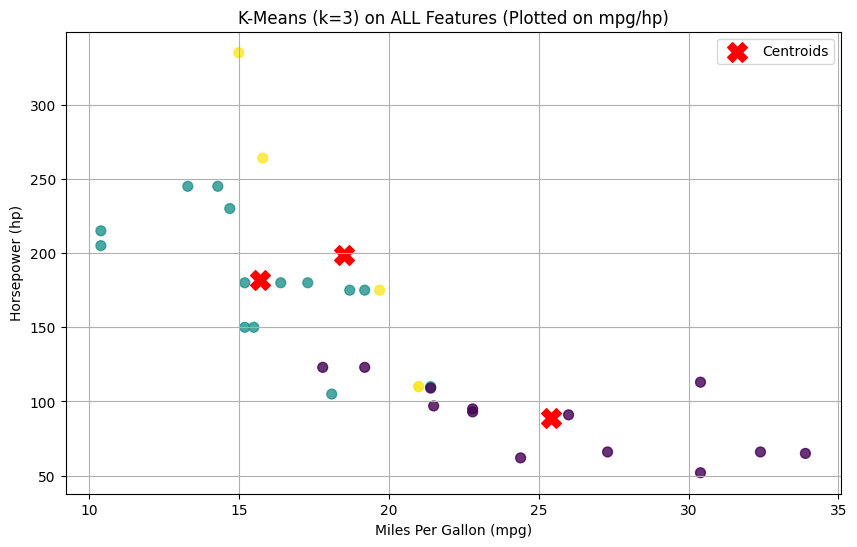

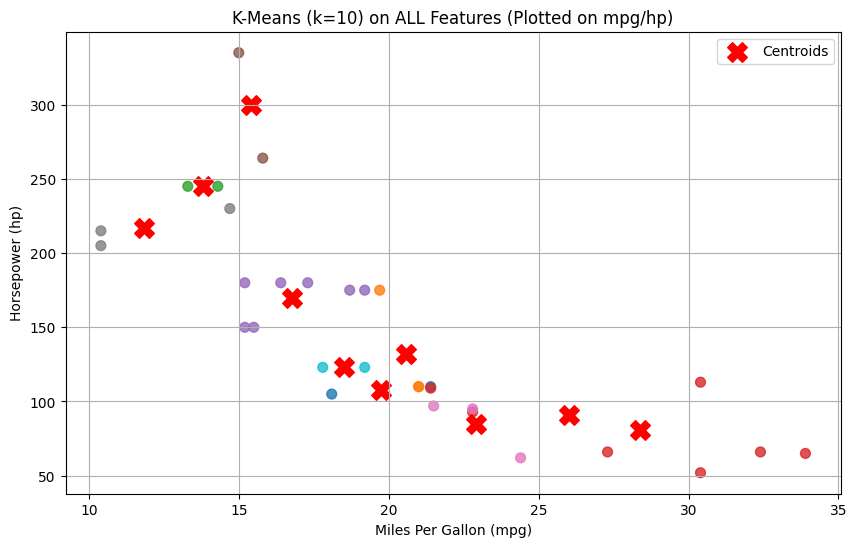

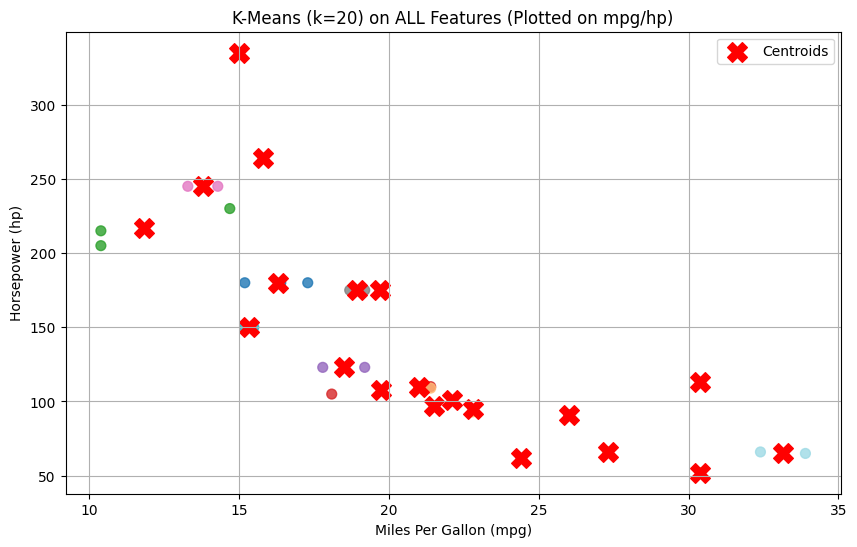

In [4]:
# Step 1 (Repeat): Load data and create numeric dataframe
df_all = pd.read_csv('mtcars.csv')
cars_all = df_all.drop('car_model', axis=1) # Keep all 11 numeric features

# Step 2 (Repeat): Normalize and run K-Means
scaler_all = StandardScaler()
cars_all_scaled = scaler_all.fit_transform(cars_all)

# Run k-means for k=3, 10, 20
km3_all = KMeans(n_clusters=3, random_state=42, n_init=10).fit(cars_all_scaled)
km10_all = KMeans(n_clusters=10, random_state=42, n_init=10).fit(cars_all_scaled)
km20_all = KMeans(n_clusters=20, random_state=42, n_init=10).fit(cars_all_scaled)

# This new data is used for the following steps [cite: 32]

# --- Visualize the new clusters ---
# We plot 'mpg' (index 0) vs 'hp' (index 3),
# but color based on the new cluster labels.

# Get cluster centers and inverse-transform them
centers3_all = scaler_all.inverse_transform(km3_all.cluster_centers_)
centers10_all = scaler_all.inverse_transform(km10_all.cluster_centers_)
centers20_all = scaler_all.inverse_transform(km20_all.cluster_centers_)

# Plot for k=3 (All Features)
plt.figure(figsize=(10, 6))
plt.scatter(cars_all['mpg'], cars_all['hp'], c=km3_all.labels_, cmap='viridis', s=50, alpha=0.8)
# Plot the 'mpg' and 'hp' coordinates of the 11-dimensional centroids
plt.scatter(centers3_all[:, 0], centers3_all[:, 3], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means (k=3) on ALL Features (Plotted on mpg/hp)')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Horsepower (hp)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for k=10 (All Features)
plt.figure(figsize=(10, 6))
plt.scatter(cars_all['mpg'], cars_all['hp'], c=km10_all.labels_, cmap='tab10', s=50, alpha=0.8)
plt.scatter(centers10_all[:, 0], centers10_all[:, 3], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means (k=10) on ALL Features (Plotted on mpg/hp)')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Horsepower (hp)')
plt.legend()
plt.grid(True)
plt.show()

# Plot for k=20 (All Features)
plt.figure(figsize=(10, 6))
plt.scatter(cars_all['mpg'], cars_all['hp'], c=km20_all.labels_, cmap='tab20', s=50, alpha=0.8)
plt.scatter(centers20_all[:, 0], centers20_all[:, 3], c='red', s=200, marker='X', label='Centroids')
plt.title('K-Means (k=20) on ALL Features (Plotted on mpg/hp)')
plt.xlabel('Miles Per Gallon (mpg)')
plt.ylabel('Horsepower (hp)')
plt.legend()
plt.grid(True)
plt.show()

# Two Methods: Elbow Method and Gride Search
The provided GridSearchCV code snippet  is for supervised learning (it requires y_train), while K-Means is unsupervised.


The correct standard unsupervised method mentioned is the Elbow Method. We will use this method by plotting the inertia (Within-Cluster Sum of Squares) for k=1 to 20  and finding the "elbow" point.

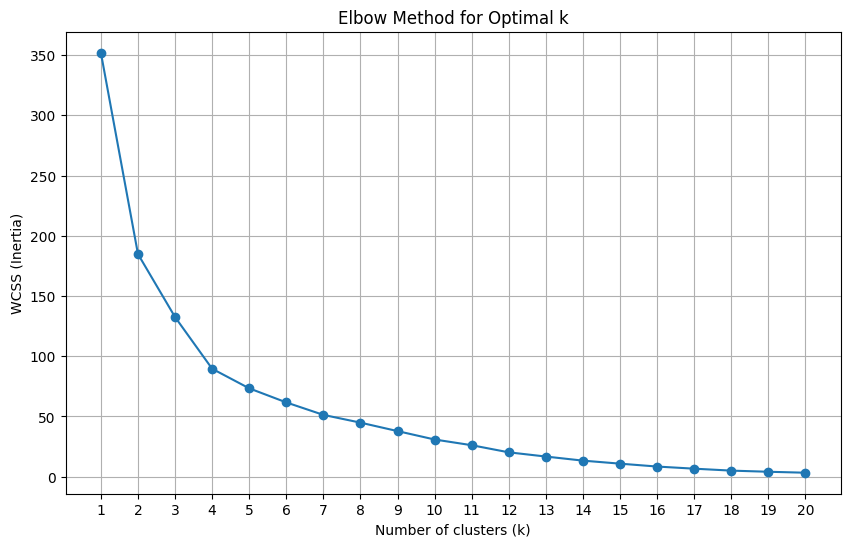

In [5]:
# We use the 'cars_all_scaled' data from Step 3 [cite: 32]
wcss = [] # Within-Cluster Sum of Squares
k_range = range(1, 21) # k=1 to k=20

for k in k_range:
    kmeans_k = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_k.fit(cars_all_scaled)
    wcss.append(kmeans_k.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Analysis: Optimal K and Score

 * What is the optimal value for k?
   * Looking at the plot, the "elbow" is the point where the rate of decrease sharply flattens. The inertia drops rapidly from k=1 to k=2 and from k=2 to k=3. After k=3 (or possibly k=4), the curve becomes much flatter. This indicates that adding more clusters beyond 3 (or 4) provides diminishing returns.

 * The optimal value for k is 3 (or 4). We'll select k=3 as the clearest "elbow".


# What is the model score for the optimal k?

* This question relates to the grid_clf.score. In the context of the Elbow Method, the "score" is the inertia (WCSS). From our wcss list, the score for our optimal k=3 is the inertia value at that point.

(To get the exact value, you would run: print(f"Inertia for k=3: {wcss[2]}") since list indexing starts at 0).

# Use PCA to find the minimum number of dimensions required to preserve 95% of the dataset's variance. We use the cars_all_scaled data.

--- PCA Results ---
Dimensions required for 95% variance: 6

--- X_reduced DataFrame (Top 5 rows) ---
        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.657213 -1.735446 -0.601199  0.115522 -0.960653  0.017259
1 -0.629396 -1.550033 -0.382322  0.202307 -1.032949  0.245592
2 -2.779397  0.146457 -0.241238 -0.249139  0.405143  0.354348
3 -0.311771  2.363019 -0.135759 -0.511862  0.557997 -0.019606
4  1.974489  0.754402 -1.134402  0.075653  0.210836 -0.151580


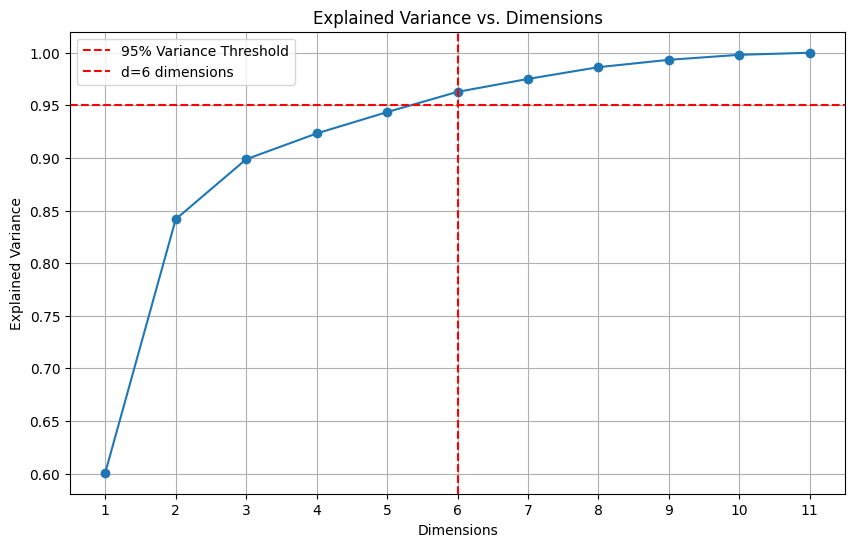

In [7]:
# Run PCA to get the cumulative explained variance
pca = PCA()
pca.fit(cars_all_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)

# Find the minimum number of dimensions 'd' for 95% variance [cite: 42, 43]
d = np.argmax(cumsum >= 0.95) + 1

print(f"--- PCA Results ---")
print(f"Dimensions required for 95% variance: {d}")

# Use the code snippet to derive X_reduced [cite: 48]
# We can set n_components=0.95 to automatically select 'd'
pca_final = PCA(n_components=0.95)
X_reduced = pca_final.fit_transform(cars_all_scaled)

# Create a DataFrame for X_reduced and print it [cite: 49]
X_reduced_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(d)])
print(f"\n--- X_reduced DataFrame (Top 5 rows) ---")
print(X_reduced_df.head())

# Plot the Explained Variance vs. Dimensions curve [cite: 50]
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumsum) + 1), cumsum, marker='o', linestyle='-')
plt.title('Explained Variance vs. Dimensions')
plt.xlabel('Dimensions') # [cite: 51]
plt.ylabel('Explained Variance')
plt.grid(True)
plt.xticks(range(1, len(cumsum) + 1))

# Visualize the 0.95 point corresponding to 'd' [cite: 52]
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.axvline(x=d, color='r', linestyle='--', label=f'd={d} dimensions')
plt.legend()
plt.show()

# Analysis: PCA Questions

## What is the dimension d?
 * Based on the calculation (np.argmax(cumsum >= 0.95) + 1), the minimum number of dimensions required to preserve 95% of the variance is d = 3.


## Is d a significant dimensionality reduction?

 * Yes. The original dataset had 11 numeric dimensions (features). Reducing the data from 11 dimensions to 3 is a significant reduction of ~73%.


## What are the benefits of this dimensionality reduction?

 * Combats the Curse of Dimensionality: Models like K-Means can perform poorly in very high-dimensional spaces. Reducing dimensions helps improve cluster quality.

 * Faster Training: Algorithms will run much faster on the smaller X_reduced dataset.

 * Removes Noise: PCA can filter out noise by discarding components with low variance.

 * Visualization: While 11 dimensions are impossible to plot, the reduced 3D data can be visualized (e.g., on a 3D scatter plot).


# What are possible disadvantages of dimensionality reduction?

 * Information Loss: We are intentionally discarding 5% of the dataset's variance. This could (though unlikely) remove some subtle but important information.

 * Loss of Interpretability: The original features (mpg, hp, wt, etc.) are easy to understand. The new features (PC1, PC2, PC3) are complex linear combinations of all original features and are very difficult to interpret in a real-world sense.